In [69]:
from scipy.io import loadmat
import numpy as np
import os
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt

In [70]:
# Indexer
class Subjects:
    class Sessions:
        class Runs:

            def __init__(self, paths) -> None:
                self.paths = sorted(paths, key= lambda x: int(x.split('_')[-1][3]))

            def __getitem__(self, run_idx):
                return self.load_data(self.paths[run_idx])
            
            def load_data(self, path):
                mat_contents = loadmat(path, struct_as_record=False, squeeze_me=True)
                return mat_contents["p"].__dict__

        def __init__(self, path) -> None:
            self.base_path = os.path.join(path, "runs")
            self.sess_paths = sorted(os.listdir(self.base_path), key= lambda x: int(x.split('_')[2][1]))
            self.sess_paths = [os.path.join(self.base_path, path) for path in self.sess_paths]
            self.sess_paths = [self.sess_paths[i:i+6] for i in range(0, len(self.sess_paths), 6)]

        def __getitem__(self, sess_idx):
            return self.Runs(self.sess_paths[sess_idx])

    def __init__(self, path) -> None:
        self.path = path
        self.subj_paths = sorted(os.listdir(path), key=lambda x: int(x.split('j')[1]))

    def __getitem__(self, sub_idx):
        return self.Sessions(os.path.join(self.path, self.subj_paths[sub_idx]))

# Refresher
def np_refresh(np_array): return np.array(np_array.tolist())

In [71]:
# Set in stone
PATH_DS = '../axej_eeg'
SUBS = 13
SESS = 4
RUNS = 6

subj = Subjects(PATH_DS)

# Index combinations at 3 levels with ittertools
data_idx = list(itertools.product(range(SUBS), range(SESS), range(RUNS)))

In [75]:
jx = np.ndarray(shape=(SUBS, SESS, RUNS), dtype=object)
jy = np.ndarray(shape=(SUBS, SESS, RUNS), dtype=object)

for subs, sess, runs in tqdm(data_idx):
    data = subj[subs][sess][runs]
    jx[subs, sess, runs] = data['joyx']
    jy[subs, sess, runs] = data['joyy']

jx = np_refresh(jx)
jy = np_refresh(jy)

jx.shape, jy.shape

100%|██████████| 312/312 [00:01<00:00, 208.37it/s]


((13, 4, 6, 120, 500), (13, 4, 6, 120, 500))

# Visualizing

In [76]:
x = jx.reshape(13, 4, -1, 500)
y = jy.reshape(13, 4, -1, 500)

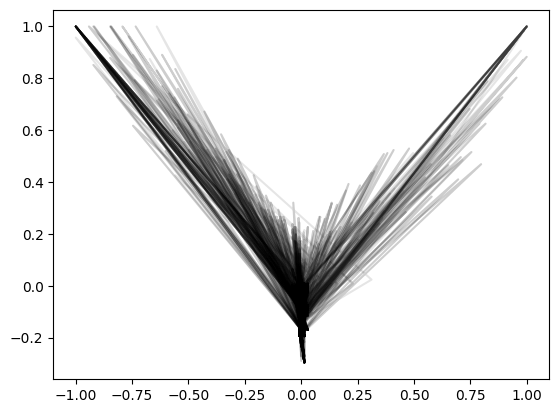

In [141]:
sub = 1
time_slice = 100
sess = 0

plt.figure()
plt.plot(x[sub, sess, :, :time_slice], y[sub, sess, :, :time_slice], c="k", alpha=0.1)
plt.show()

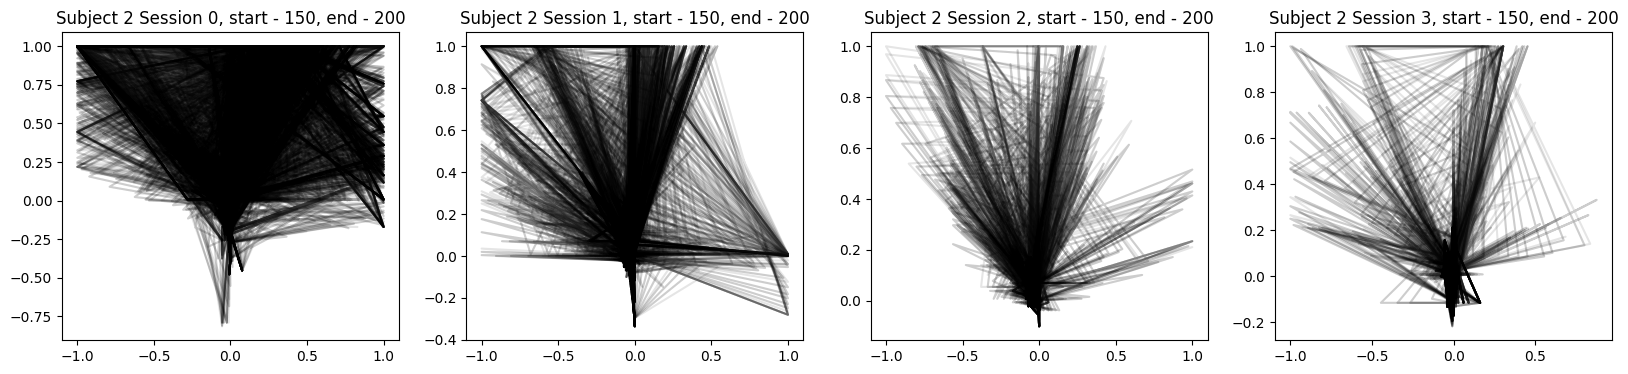

In [161]:
# make 4x1 plots for each session
sub = 2
time_s = 150
time_e = 200

fig, axs = plt.subplots(1, 4, figsize=(20, 4))
for sess in range(4):
    axs[sess].plot(x[sub, sess, :, time_s:time_e], y[sub, sess, :, time_s:time_e], c="k", alpha=0.1)
    axs[sess].set_title(f"Subject {sub} Session {sess}, start - {time_s}, end - {time_e}")


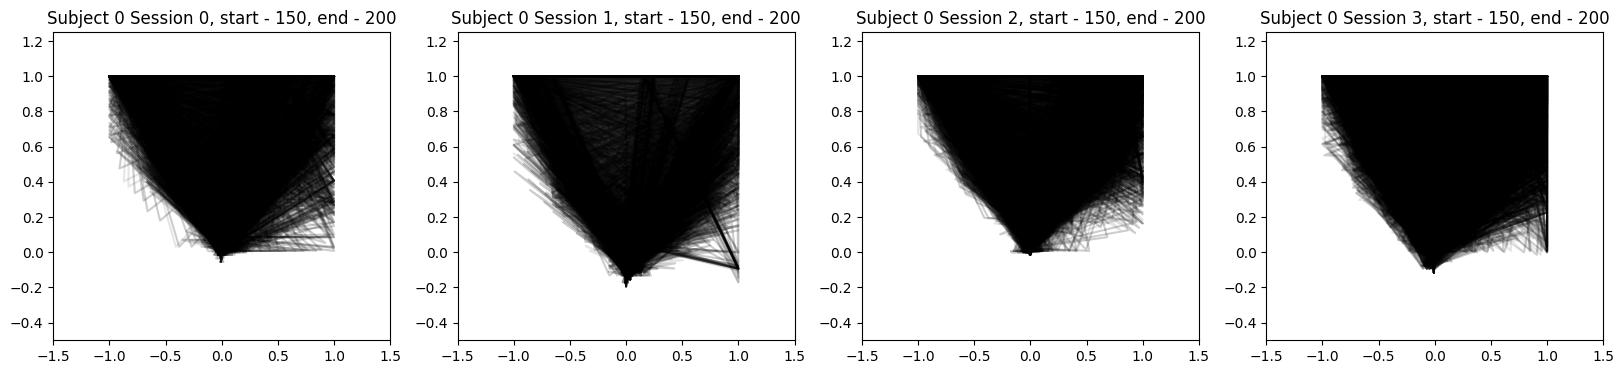

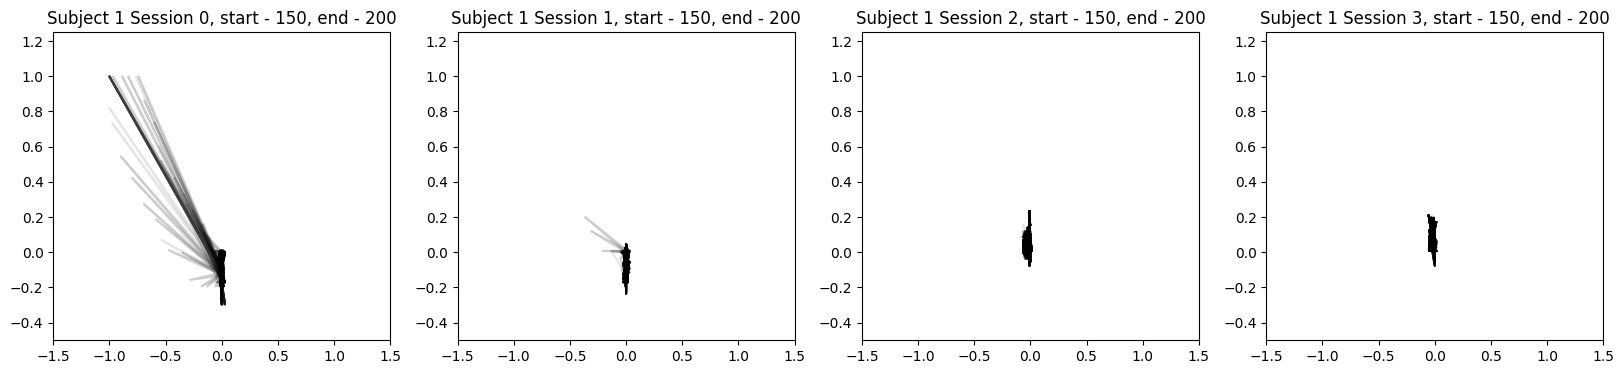

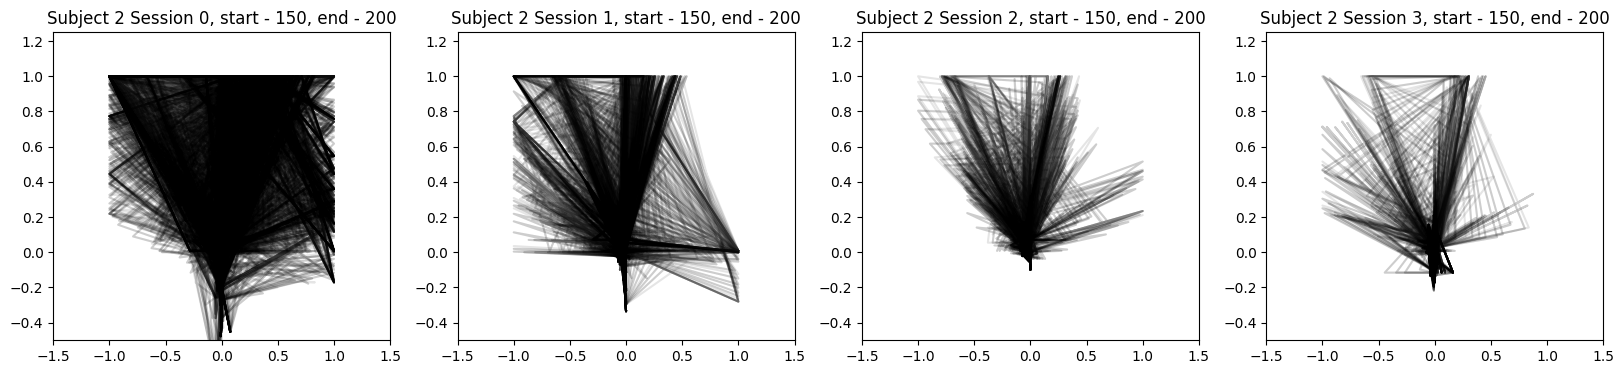

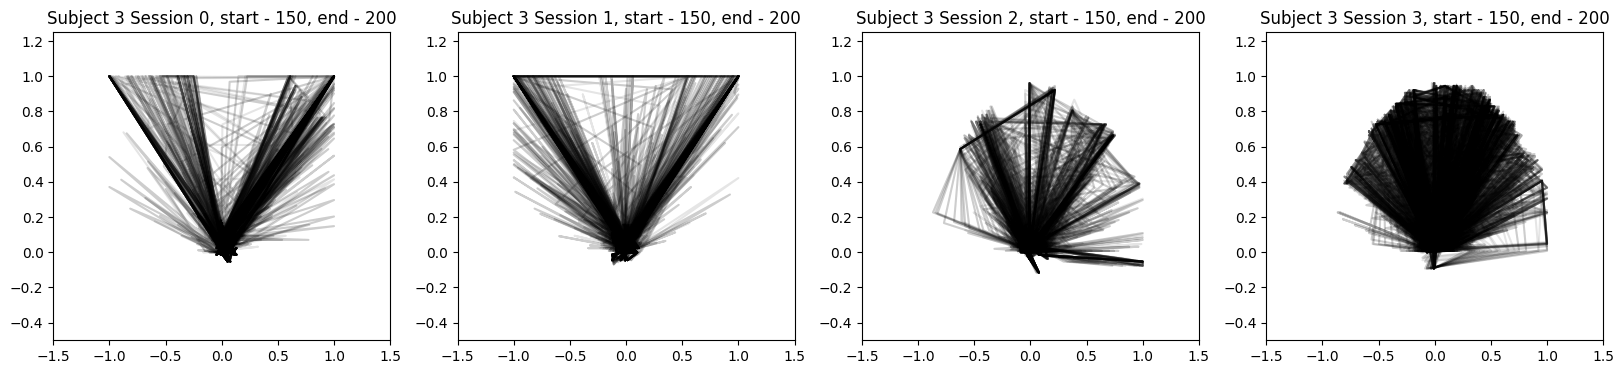

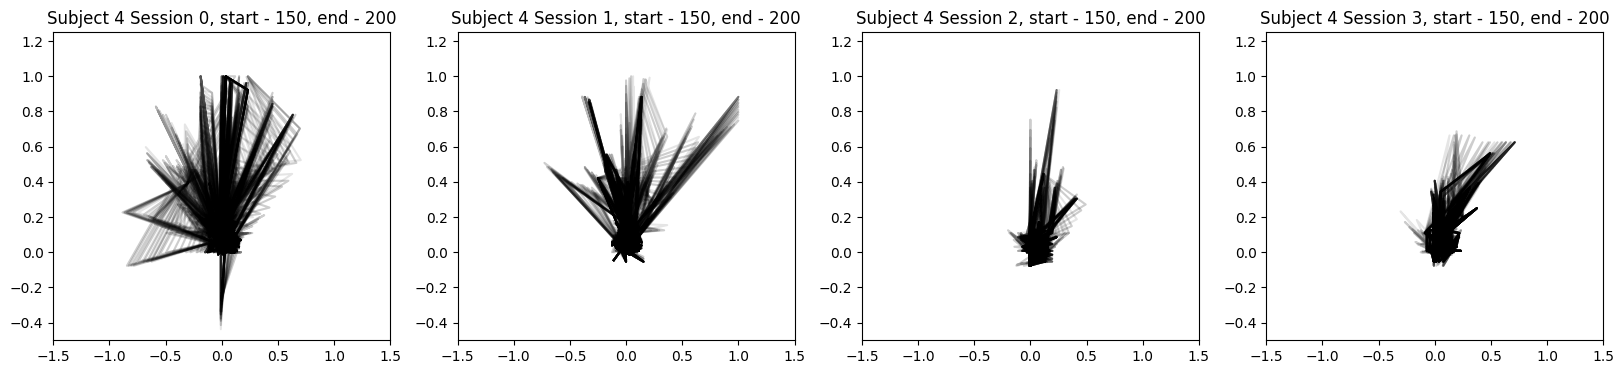

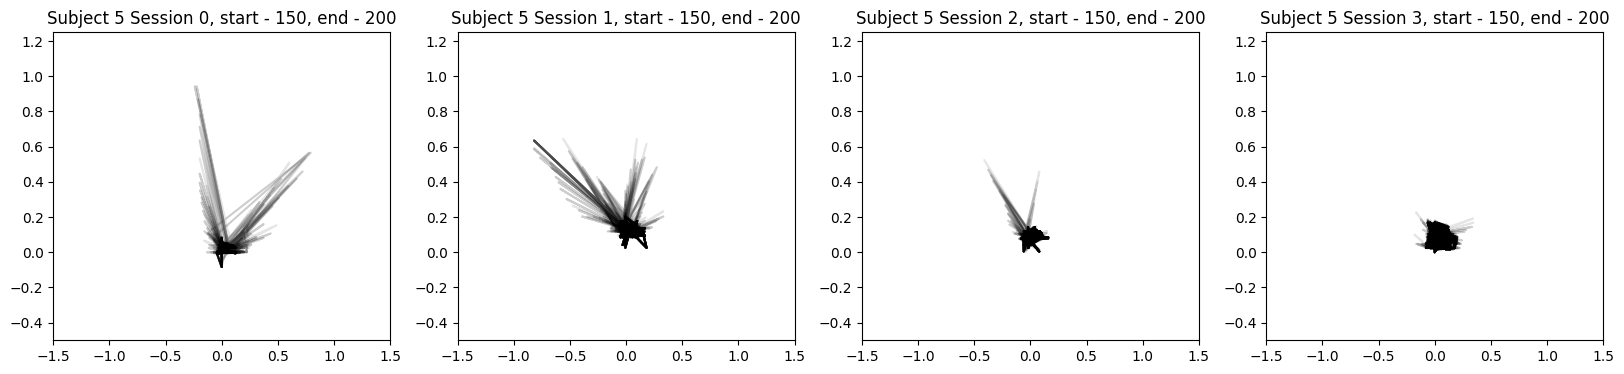

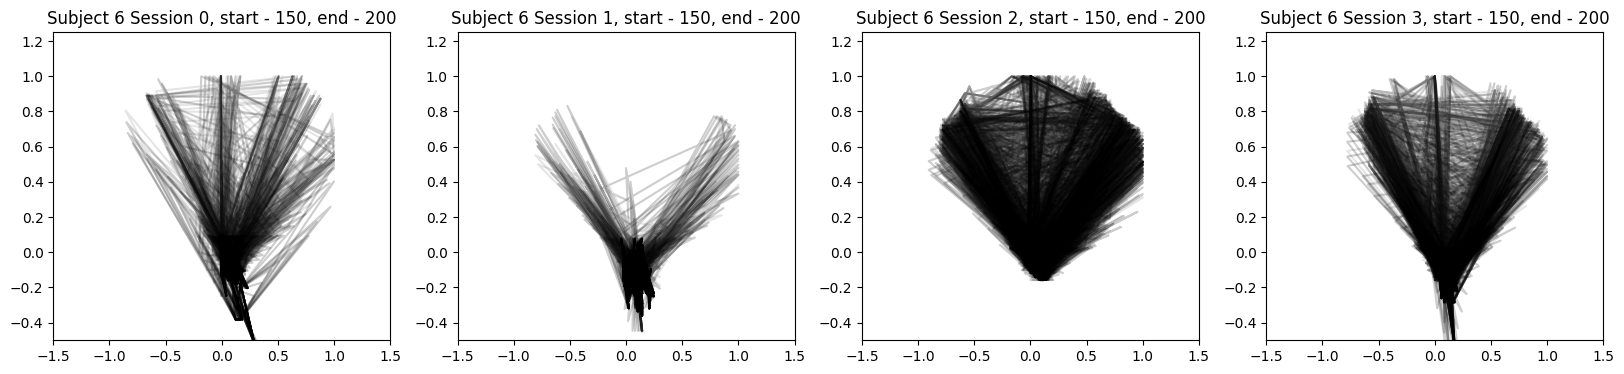

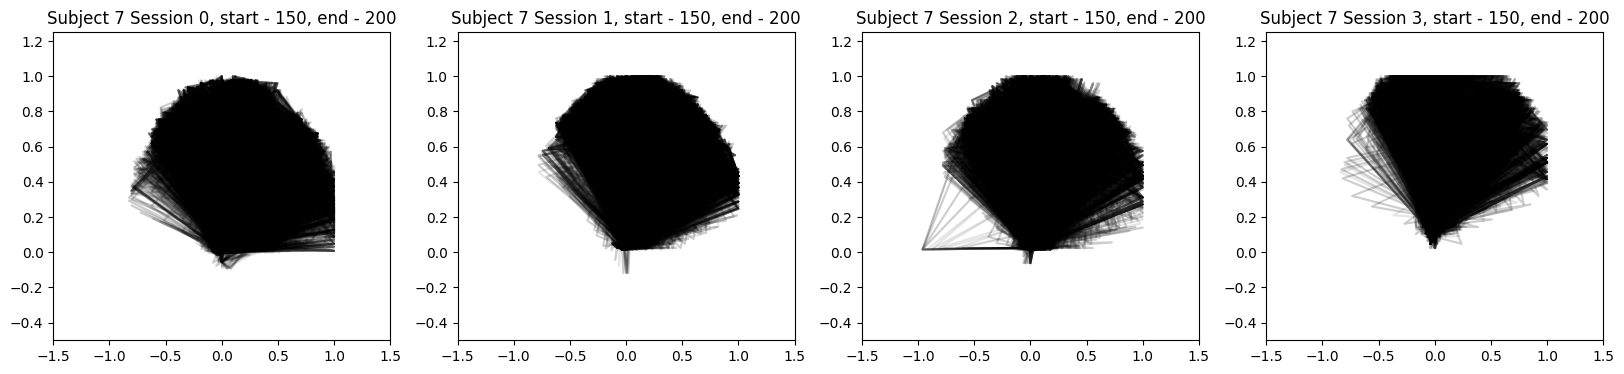

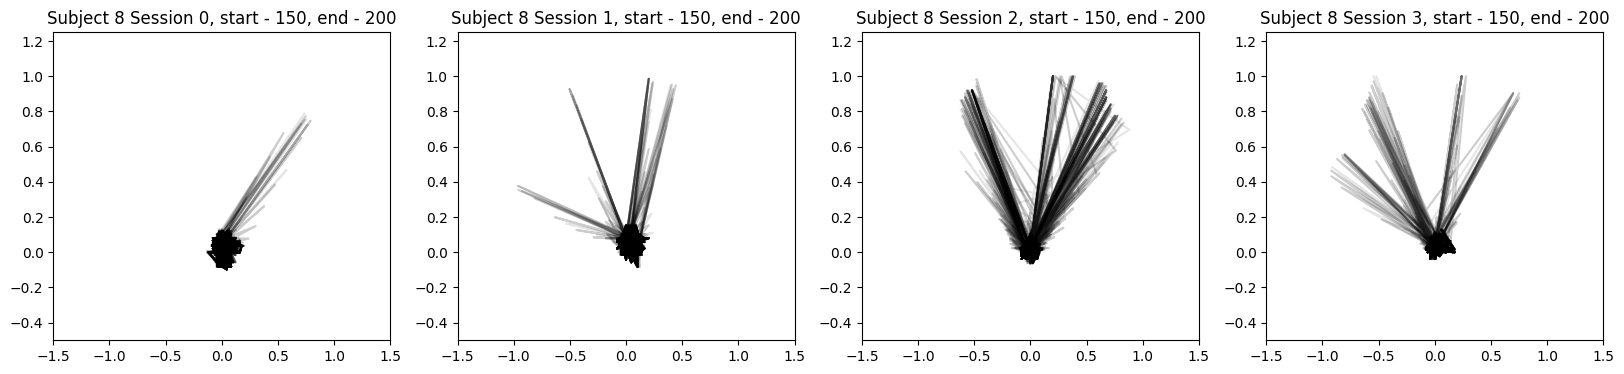

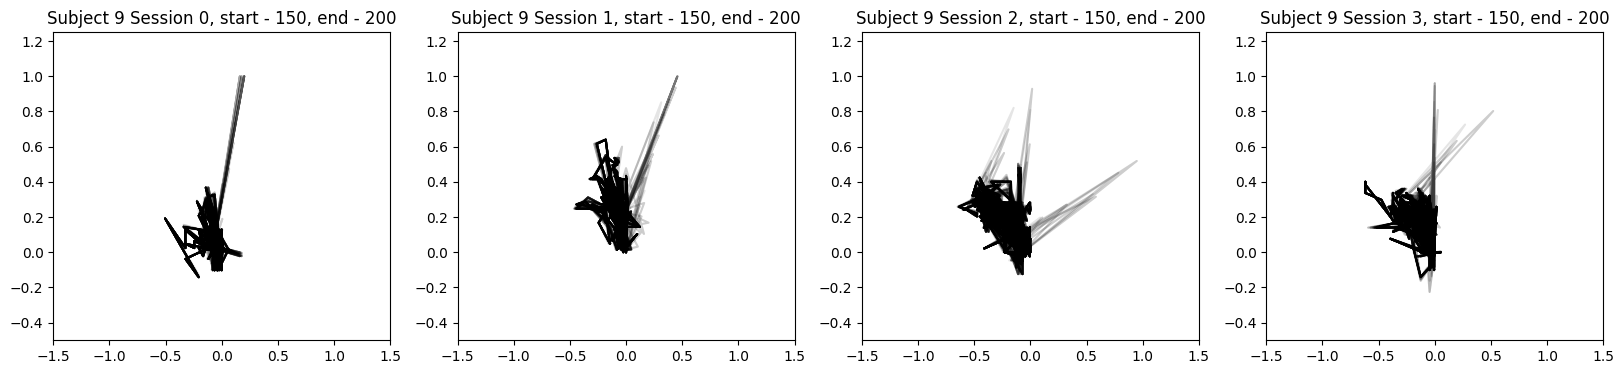

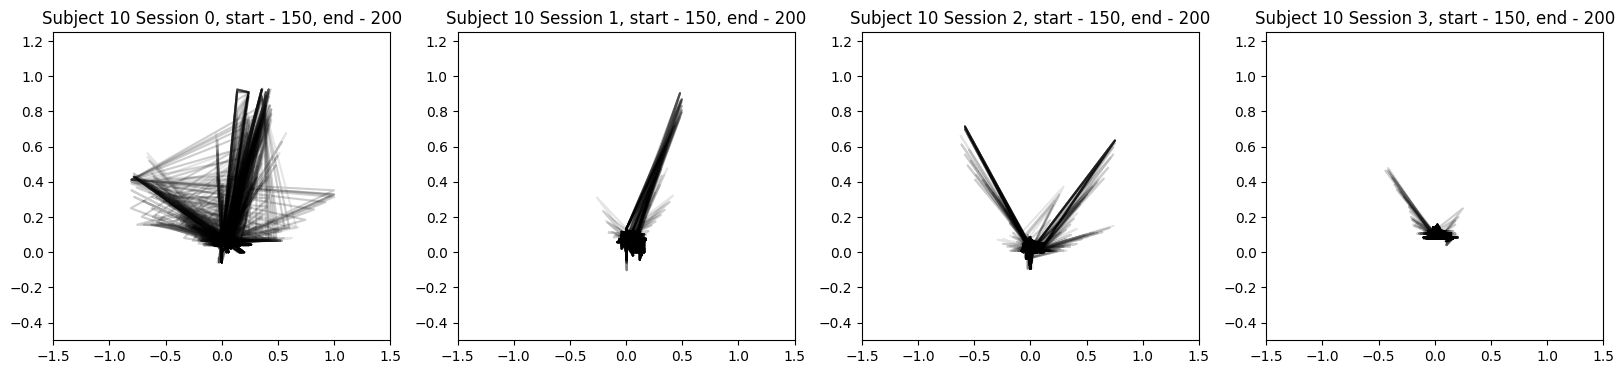

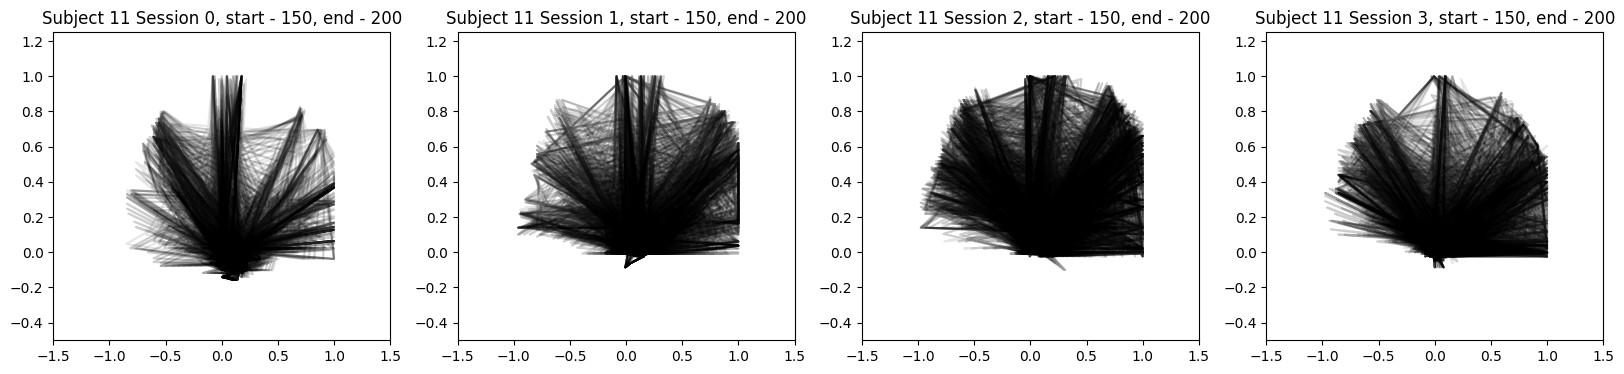

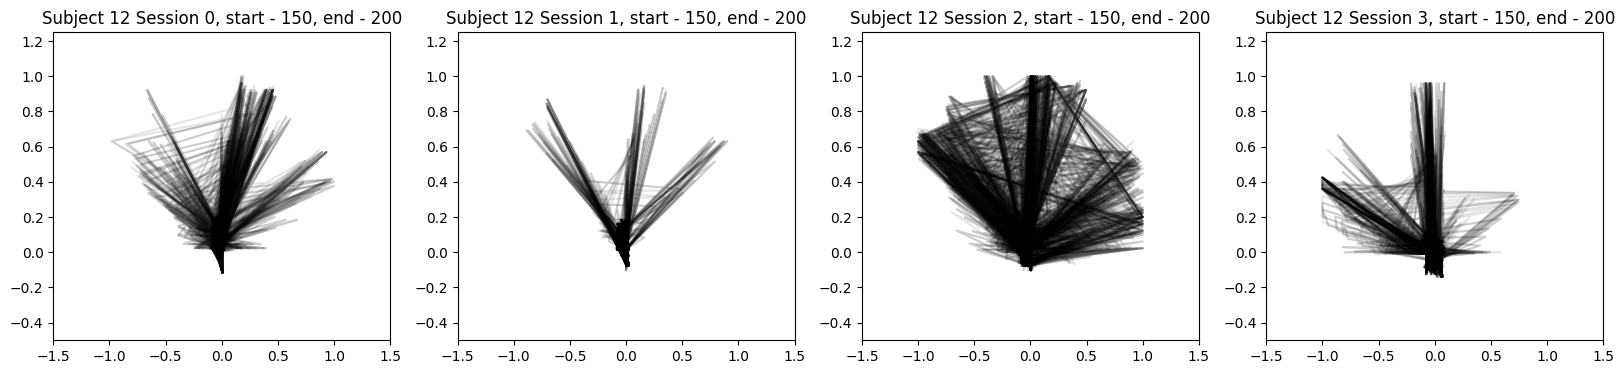

In [159]:
# make 4x1 plots for each session
# sub = 2
time_s = 150
time_e = 200

for sub in range(13):
    fig, axs = plt.subplots(1, 4, figsize=(20, 4))
    for sess in range(4):
        axs[sess].plot(x[sub, sess, :, time_s:time_e], y[sub, sess, :, time_s:time_e], c="k", alpha=0.1)
        axs[sess].set_title(f"Subject {sub} Session {sess}, start - {time_s}, end - {time_e}")
        axs[sess].set_xlim(-1.5, 1.5)
        axs[sess].set_ylim(-0.5, 1.25)
    plt.plot()

# Base shapes

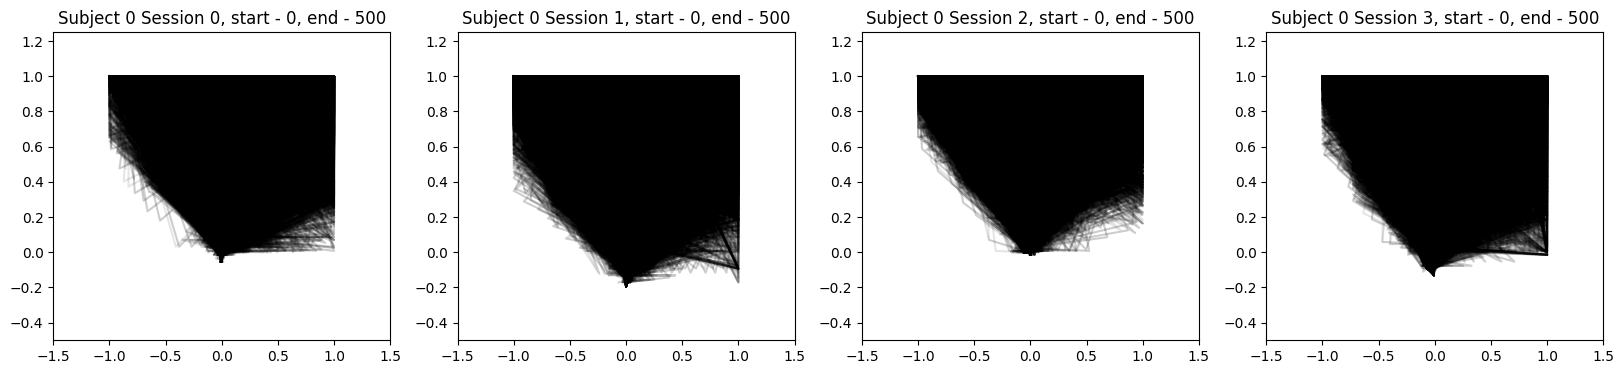

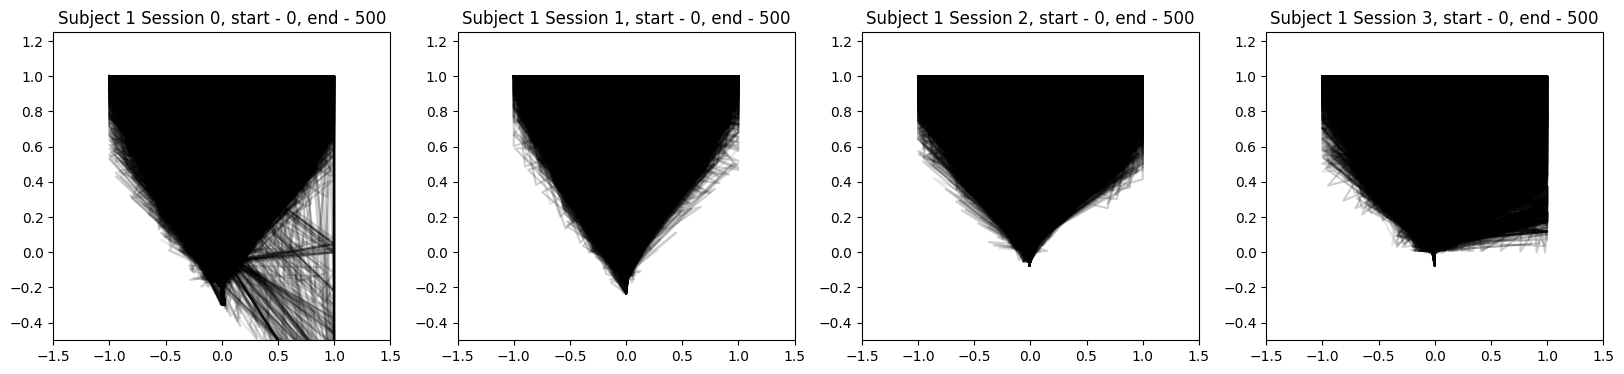

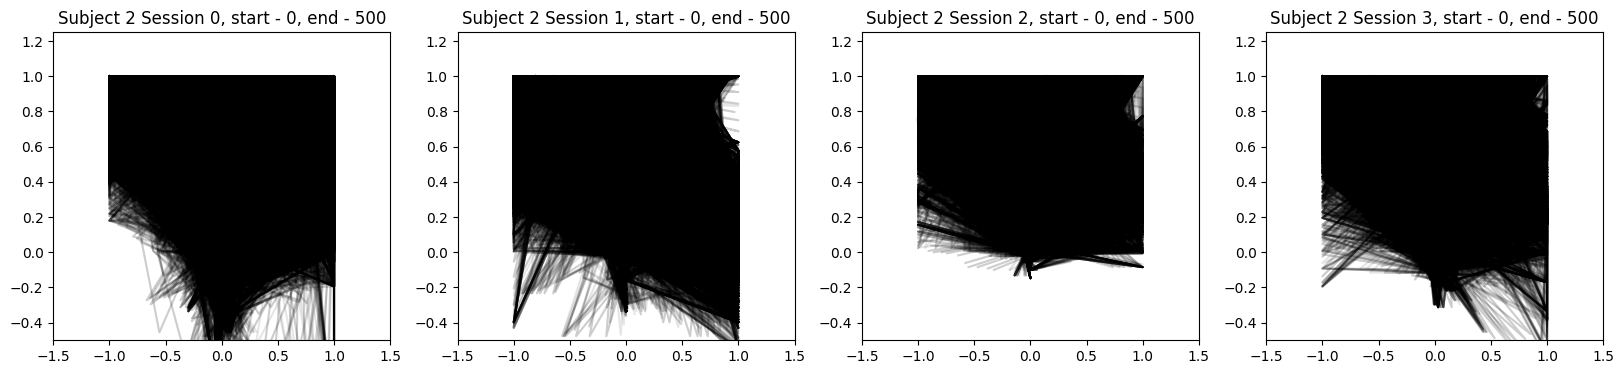

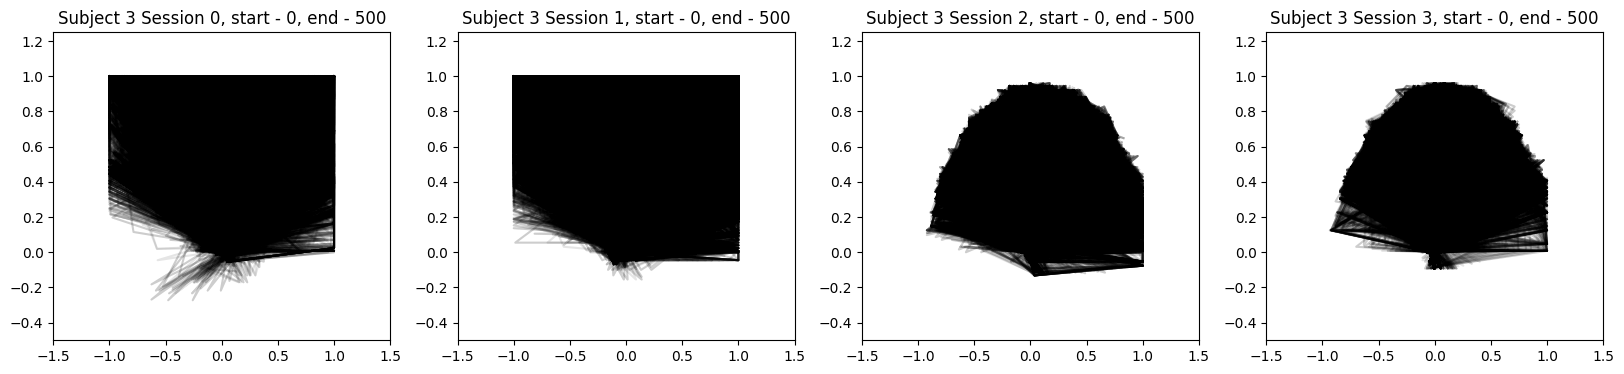

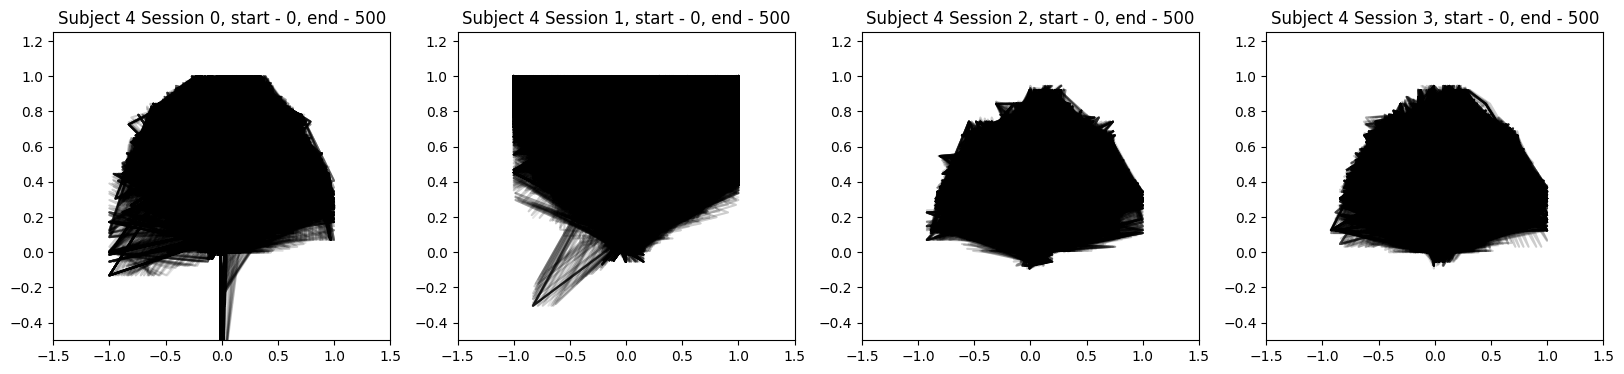

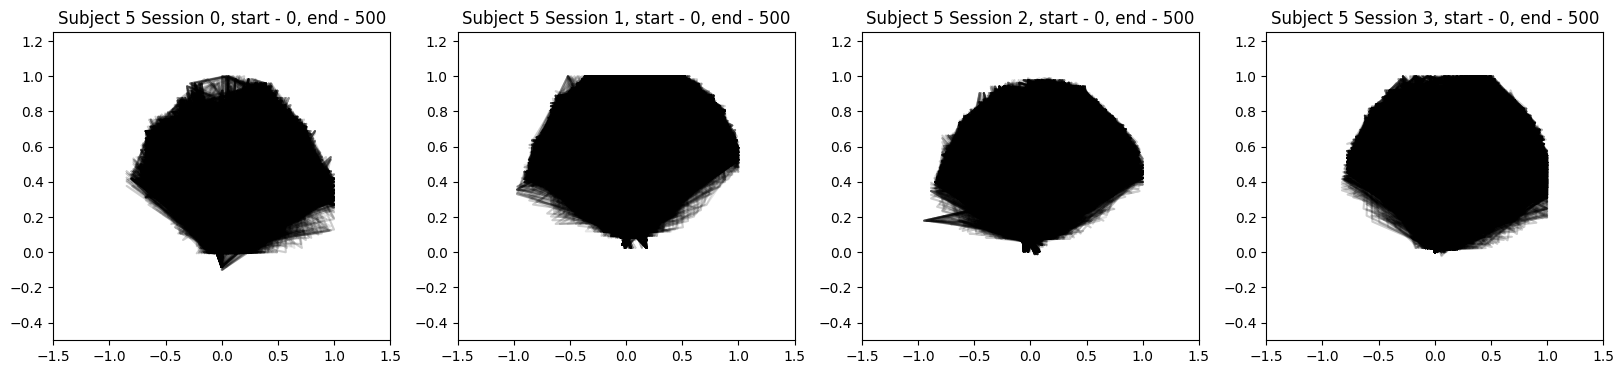

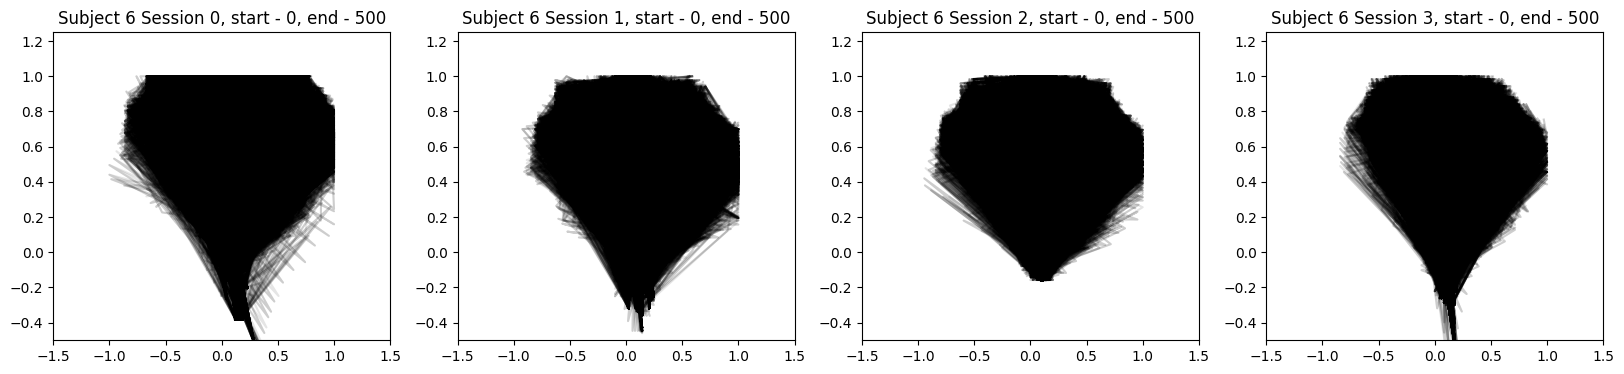

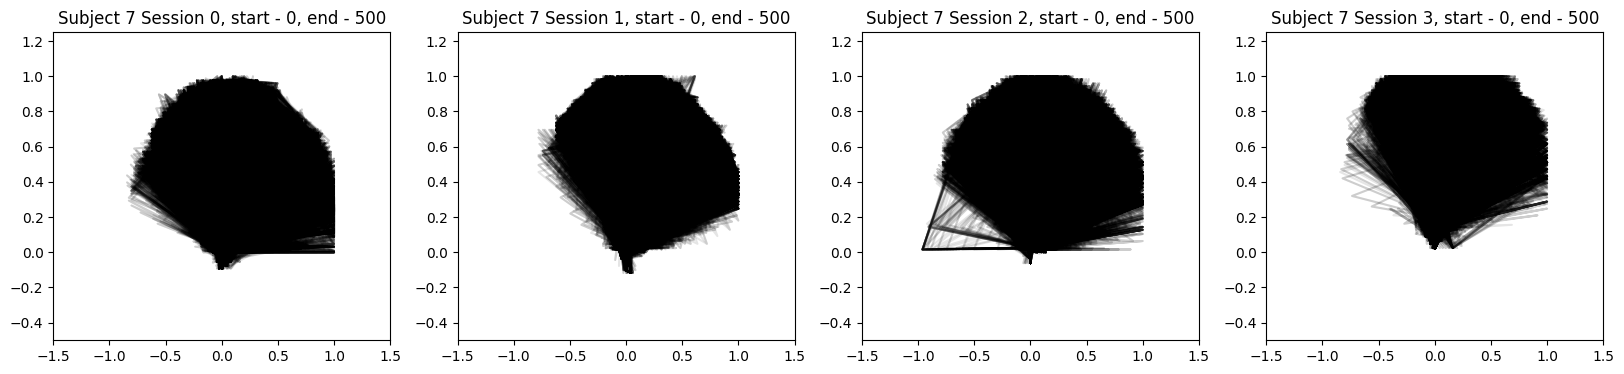

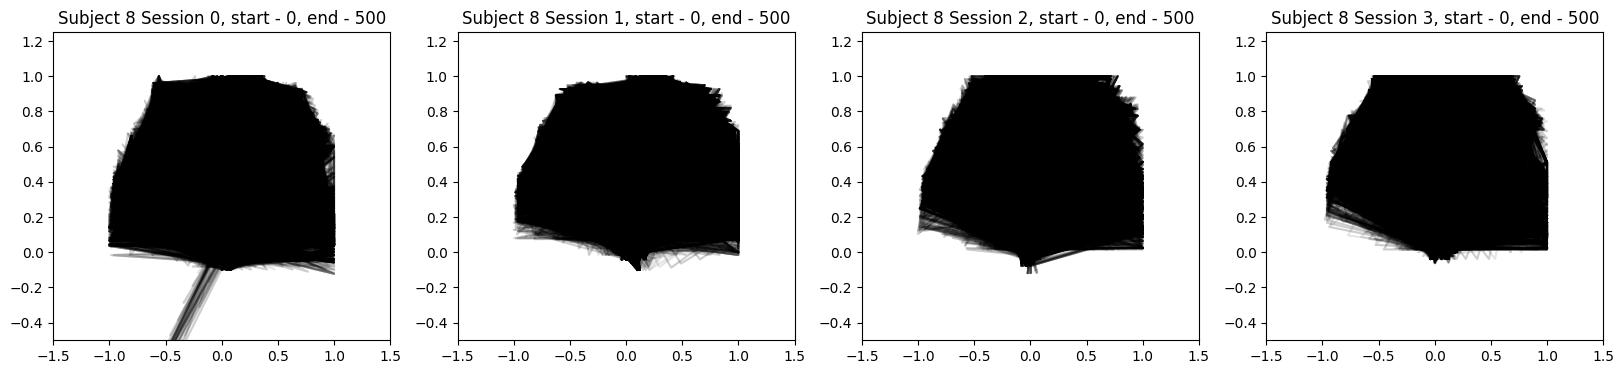

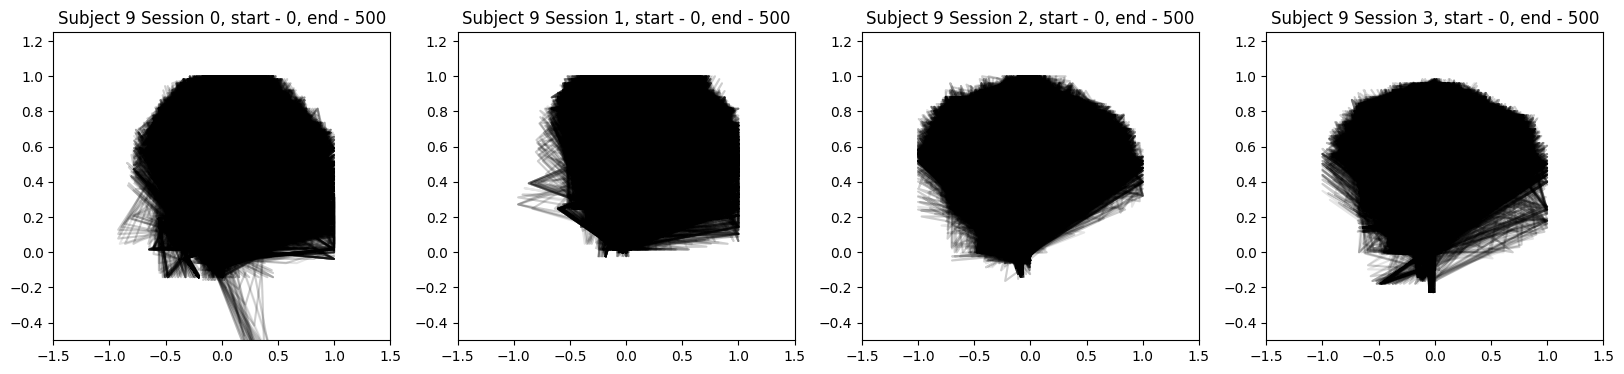

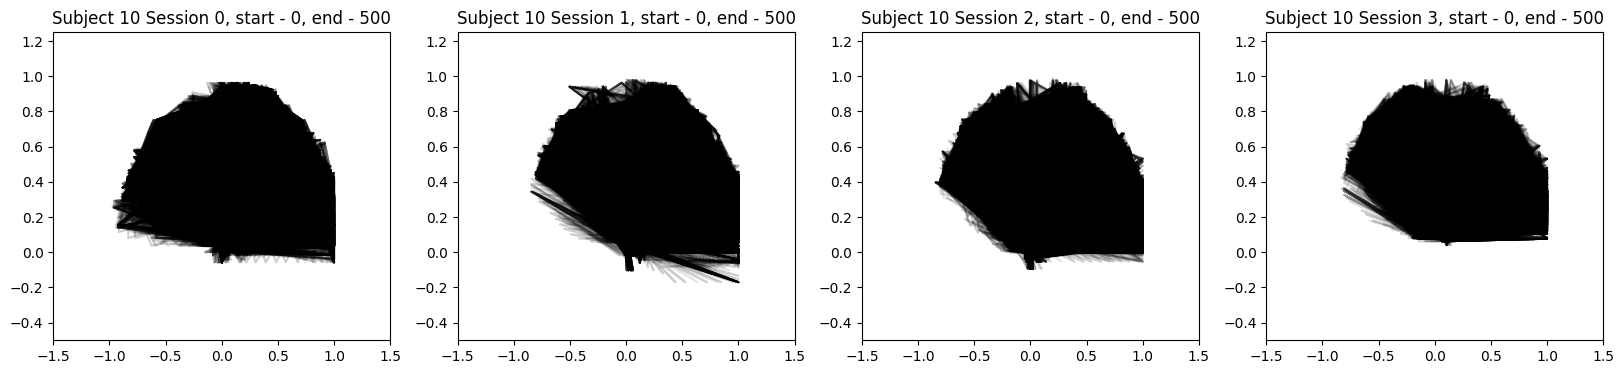

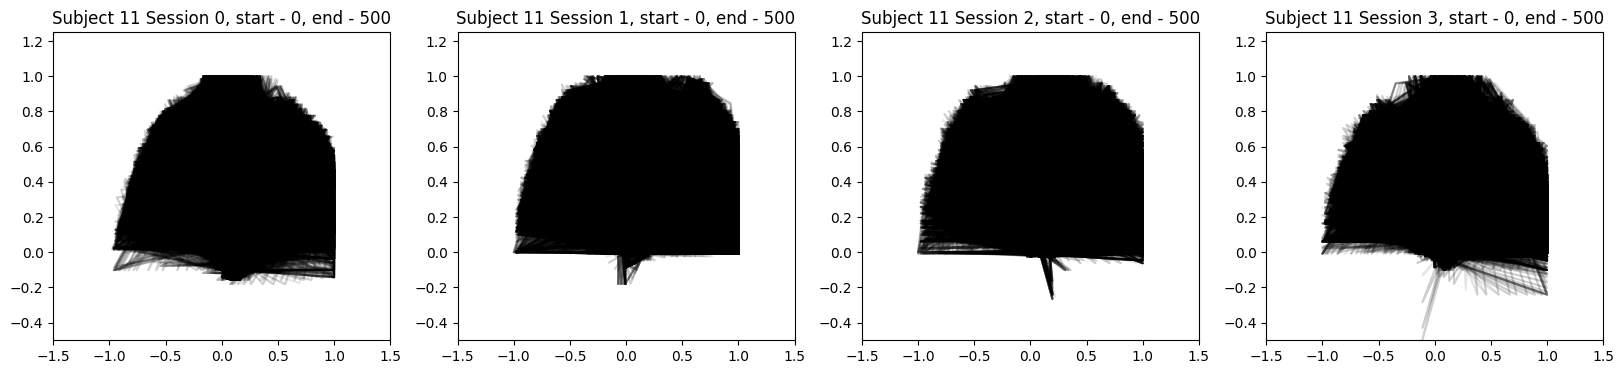

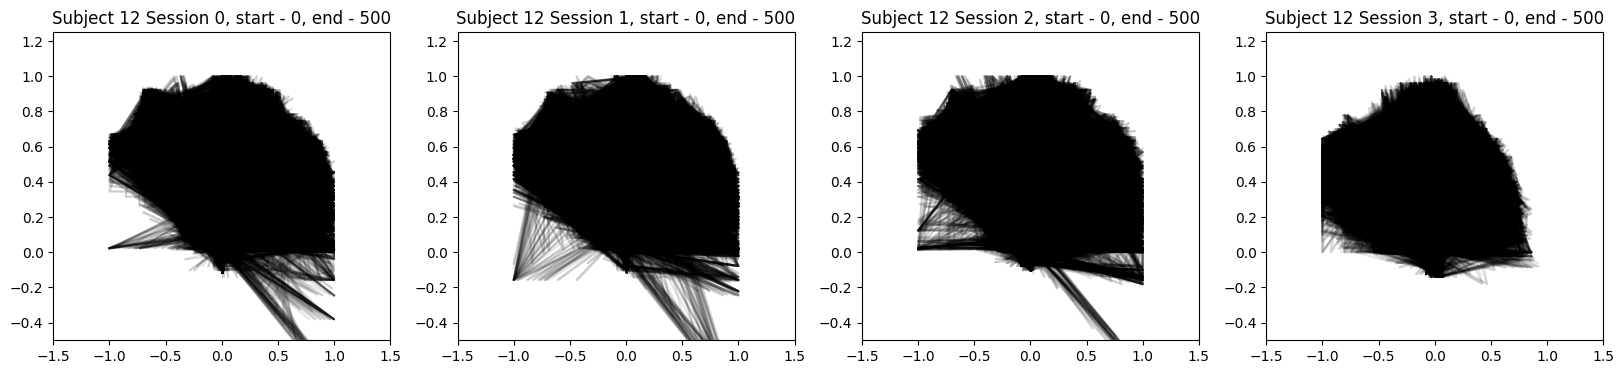

In [160]:
# make 4x1 plots for each session
# sub = 2
time_s = 0
time_e = 500

for sub in range(13):
    fig, axs = plt.subplots(1, 4, figsize=(20, 4))
    for sess in range(4):
        axs[sess].plot(x[sub, sess, :, time_s:time_e], y[sub, sess, :, time_s:time_e], c="k", alpha=0.1)
        axs[sess].set_title(f"Subject {sub} Session {sess}, start - {time_s}, end - {time_e}")
        axs[sess].set_xlim(-1.5, 1.5)
        axs[sess].set_ylim(-0.5, 1.25)
    plt.plot()